In [10]:
%config InlineBackend.figure_format = 'retina'

# Two Dimensional Histograms

## Introduction

Two-dimensional histograms function in much the same way as one-dimensional histograms, however, instead of having the bins over which you're counting be defined by edges along a single access, bins exist in two dimensions and are defined jointly across multiple axes. Take a look at the figure below, we have two axes for which each data point, in green, in plotted. Both the x and y axes are each divided up into bins with edges at 0, 0.25, 0.5, 0.75, and 1. For each grid cell, we count how many samples fall into the bin and that is the value that we plot in the histogram.

![Two-dimensional histograms explained](img/5.1-2dhistogram.png)

## Simple example

Let's walk through a simple example. We'll create some sample data and start by scatter plotting the samples. Let's take a dataset where each data point represents a penguin and two measurements of that penguin: the length of its bill and the length of its flipper. Let's load the data

In [4]:
import pandas as pd

penguins = pd.read_csv("data/penguins-condensed.csv")
penguins

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190
...,...,...
337,47.2,214
338,46.8,215
339,50.4,222
340,45.2,212


Now let's scatter plot the data:

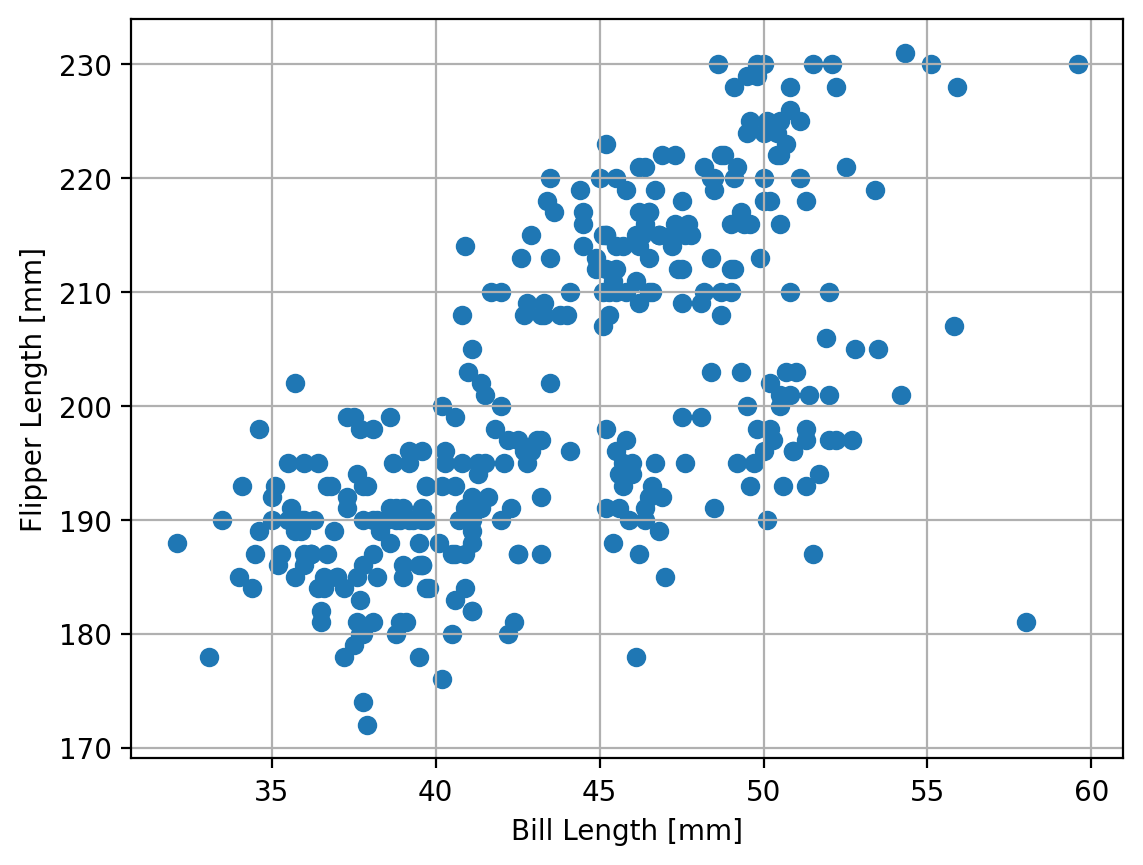

In [11]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(penguins['bill_length_mm'],penguins['flipper_length_mm'])
ax.set_xlabel('Bill Length [mm]')
ax.set_ylabel('Flipper Length [mm]')
ax.grid(True)

There's a lot of overlap in the data here. Let's make the markers that are plotted in the scatter plot partially transparent by setting the alpha parameter to 0.5. For that parameter, 1 is fully opaque while 0 is fully transparent.

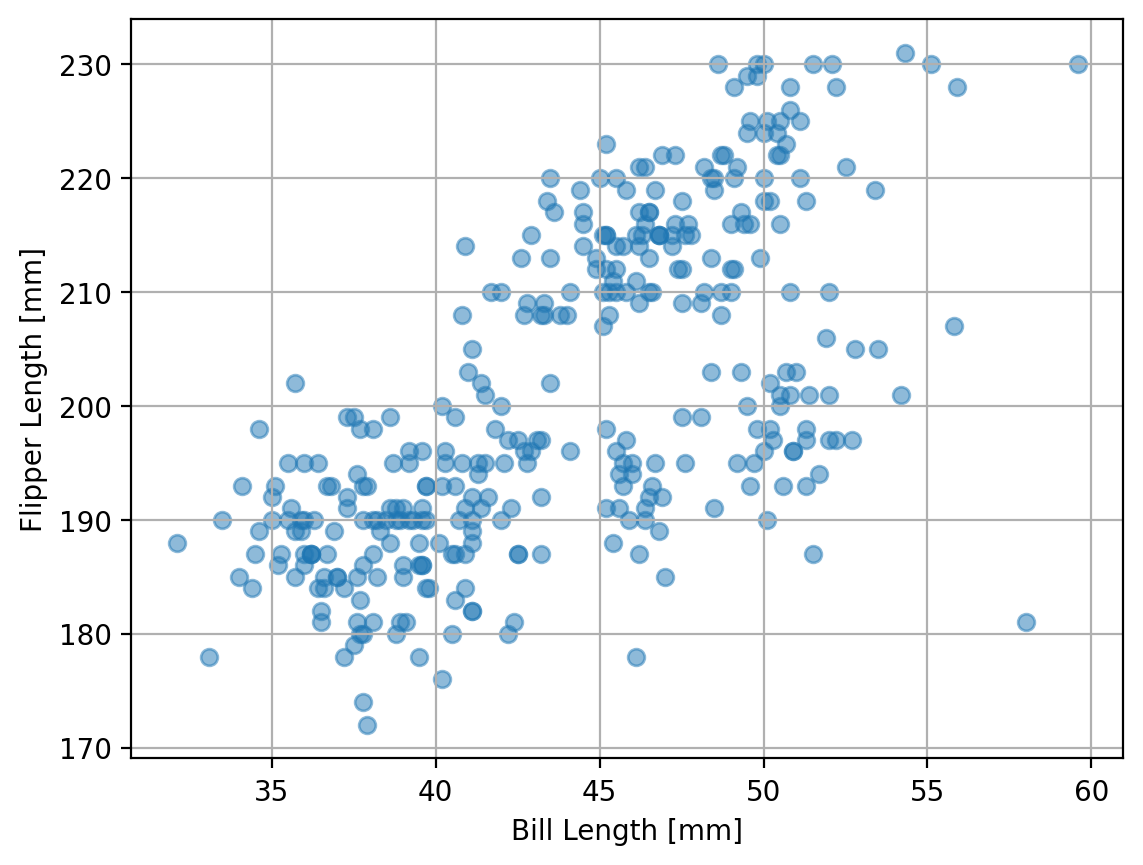

In [25]:
fig, ax = plt.subplots()

ax.scatter(penguins["bill_length_mm"], penguins["flipper_length_mm"], alpha=0.5)
ax.set_xlabel("Bill Length [mm]")
ax.set_ylabel("Flipper Length [mm]")
ax.grid(True)

So now we're ready to make our histogram. We can do this with the `hist2d()` command. This method takes an array of our x and y data (which we can input either as a numpy array or pandas Series). Lets create our 2D histogram!

Text(0, 0.5, 'Flipper Length [mm]')

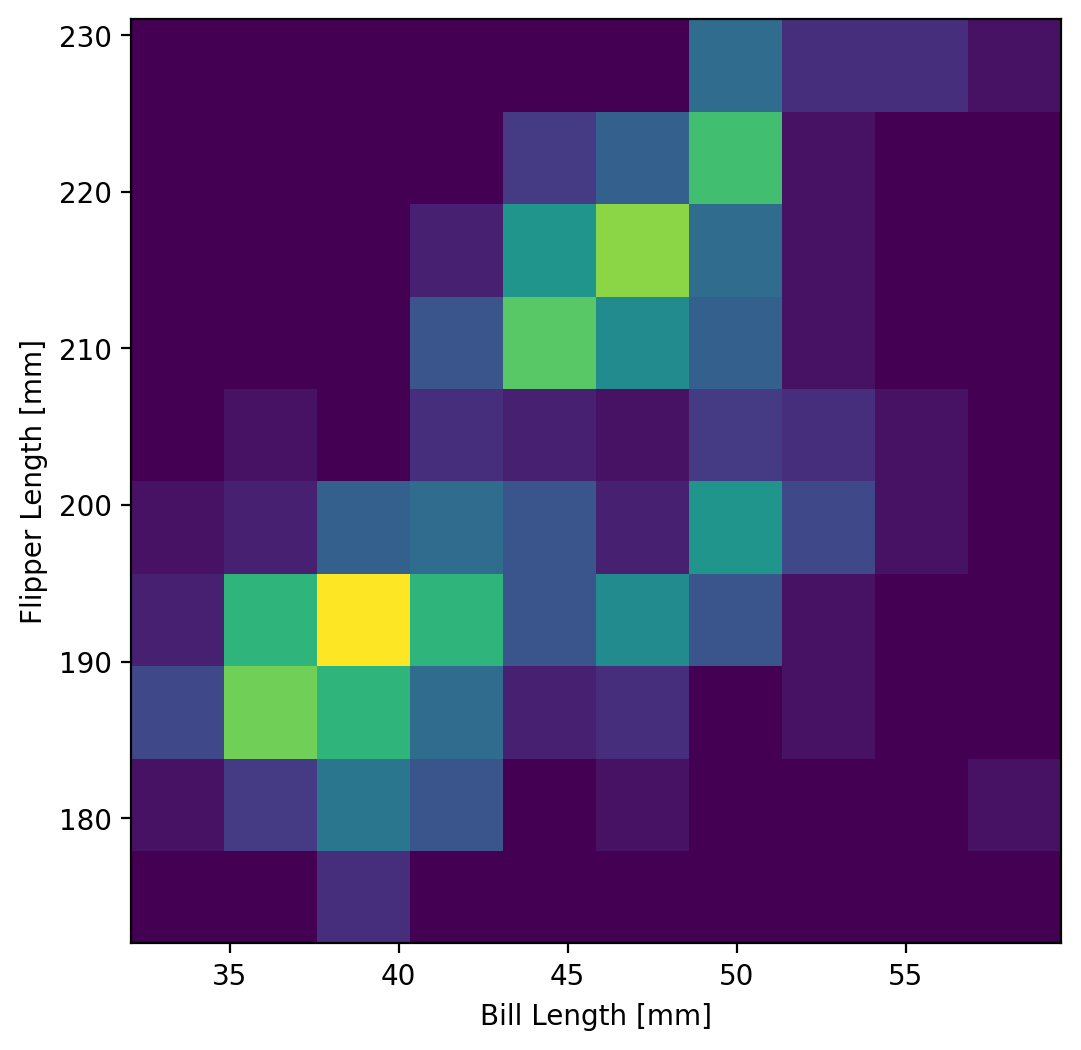

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.hist2d(penguins["bill_length_mm"], penguins["flipper_length_mm"], bins=10)
ax.set_xlabel("Bill Length [mm]")
ax.set_ylabel("Flipper Length [mm]")

This is an example of a heatmap. The intensity of the color represents the magnitude of the count of samples from the dataset that fall into the corresponding bins of the histogram. Let's add a colorbar to this plot. To add a colorbar, we can need to get the output from the hist2d method, which returns the histogram data (the counts), the bin edges (both x and y) that were used for making the histogram, and the image plot object which contains the information that the colorbar function needs to work. So the full output from the function can be written as:

```
counts, xedges, yedges, im = ax.hist2d(penguins['bill_length_mm'],penguins['flipper_length_mm'], bins=10)
```

With this, we can feed this into the `fig.colorbar()` method which takes as input the image plot object (which we called `im` above) and the axes object that we're going to be placing the colorbar. let's try this out!

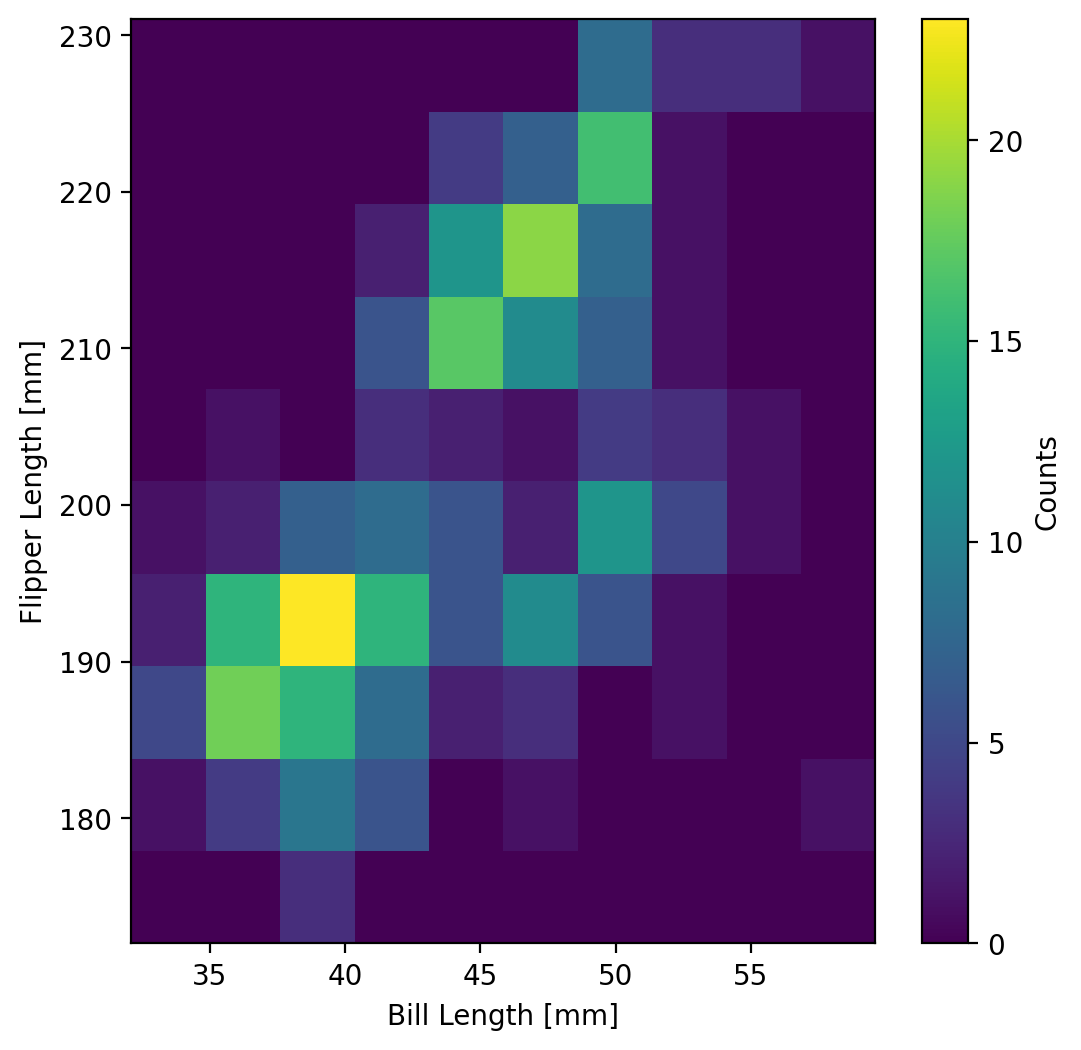

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
counts, xedges, yedges, im = ax.hist2d(
    penguins["bill_length_mm"], penguins["flipper_length_mm"], bins=10
)
ax.set_xlabel("Bill Length [mm]")
ax.set_ylabel("Flipper Length [mm]")

fig.colorbar(im, ax=ax, label="Counts")

We may also want to change the colormap (although the default colormap shown above (viridis) is an excellent default choice because it is perceptually uniform for clearer communication of your data. But there are [many other colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html). To change a colormap, just use the colormap keyword when you're plotting your heatmap. For example, let's say we wanted the "plasma" colormap instead:

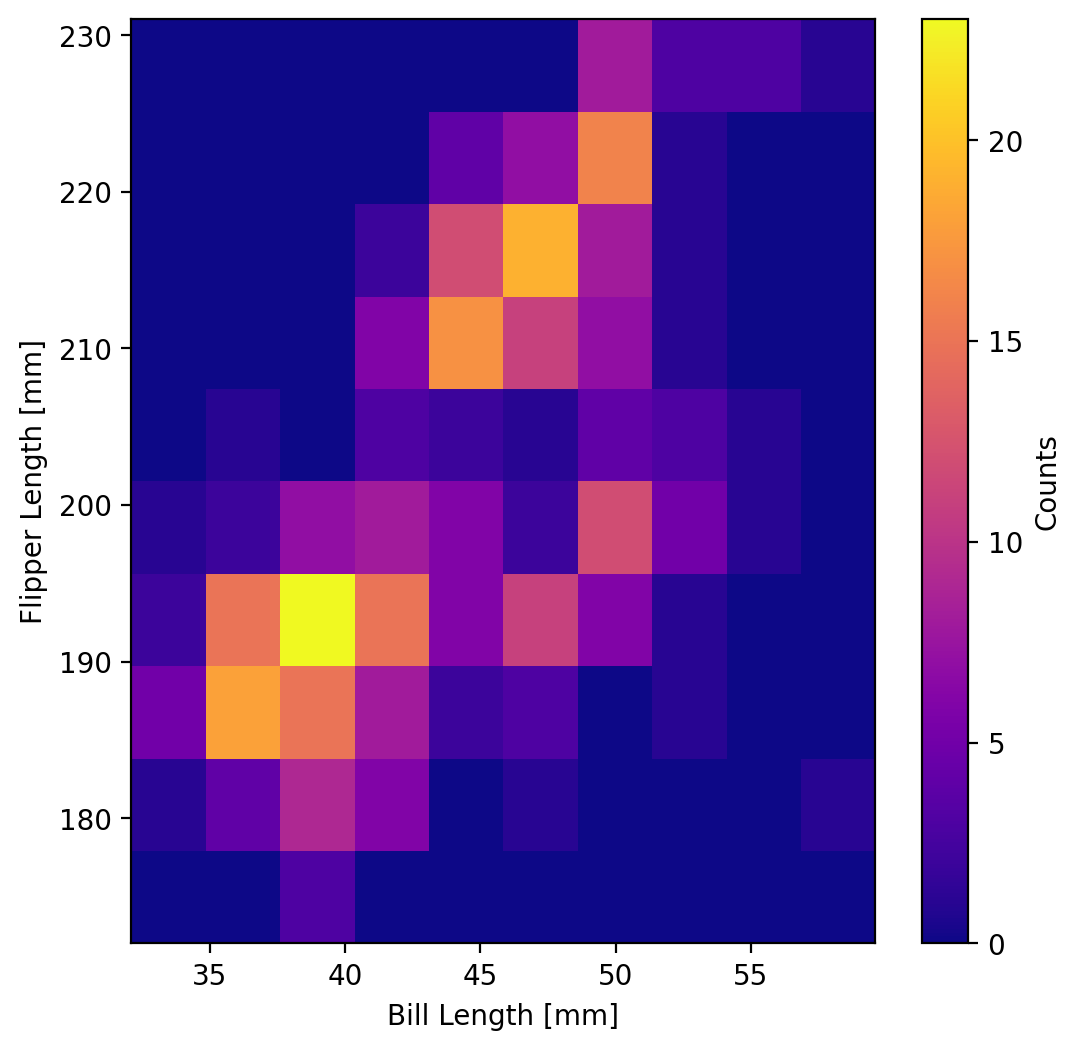

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
counts, xedges, yedges, im = ax.hist2d(
    penguins["bill_length_mm"], penguins["flipper_length_mm"], bins=10, cmap="plasma"
)
ax.set_xlabel("Bill Length [mm]")
ax.set_ylabel("Flipper Length [mm]")

fig.colorbar(im, ax=ax, label="Counts")

Now let's plot the scatter plot and the histogram side-by-side in a subplot to see these data and explore that the 2D histogram is showing:

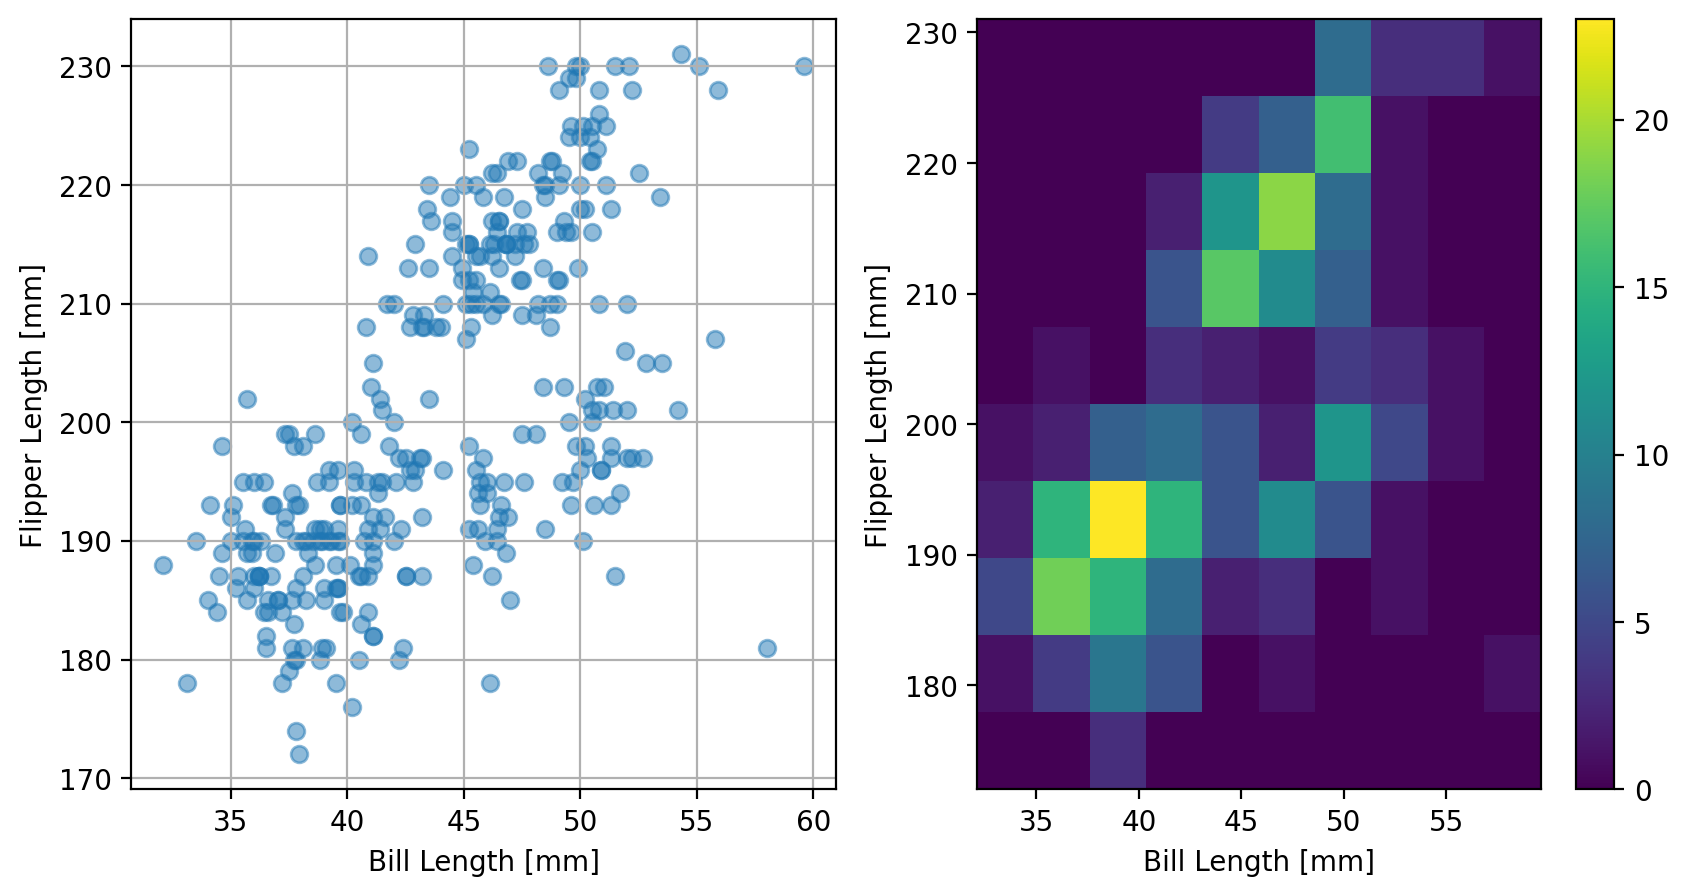

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))


def penguin_scatter(ax):
    plot = ax.scatter(
        penguins["bill_length_mm"], penguins["flipper_length_mm"], alpha=0.5
    )
    ax.set_xlabel("Bill Length [mm]")
    ax.set_ylabel("Flipper Length [mm]")
    ax.grid(True)
    return plot


def penguin_hist(ax):
    counts, xedges, yedges, im = ax.hist2d(
        penguins["bill_length_mm"], penguins["flipper_length_mm"], bins=10
    )
    ax.set_xlabel("Bill Length [mm]")
    ax.set_ylabel("Flipper Length [mm]")
    plt.colorbar(im)
    return im


penguin_scatter(axs[0])
im = penguin_hist(axs[1])

fig.colorbar(im, ax=ax, label="Counts")

Here we can clearly see that the most dense areas are reflected in the histogram where the count (indicated by the color of the heatmap) is larger. Both of these views of our data are useful. If there are too many points, scatter plots may not be capable of clearly quantifying the distribution of the data; two-dimensional histograms certainly can.

In the next section we'll put this into use with a larger dataset.